In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from array import array


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('1enero.csv', usecols=[5], engine='python')
print(dataframe)
dataset = dataframe.values
dataset = dataset.astype('float32')


      Valor
0      66.9
1      63.8
2      64.5
3      62.1
4      65.9
...     ...
1435   64.7
1436   65.3
1437   63.1
1438   66.3
1439   65.6

[1440 rows x 1 columns]


In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.97)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("Done")

Done


In [ ]:

model = Sequential()
model.add(Bidirectional(LSTM(20, input_shape=(1, look_back)), merge_mode='mul'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics='accuracy')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])



Epoch 1/100
1394/1394 [==============================] - 7s 2ms/step - loss: 0.0144 - accuracy: 2.9207e-04
Epoch 2/100
1394/1394 [==============================] - 3s 2ms/step - loss: 0.0120 - accuracy: 2.3140e-04
Epoch 3/100
1394/1394 [==============================] - 3s 2ms/step - loss: 0.0129 - accuracy: 0.0035
Epoch 4/100
1394/1394 [==============================] - 3s 2ms/step - loss: 0.0113 - accuracy: 0.0016
Epoch 5/100
1394/1394 [==============================] - 3s 2ms/step - loss: 0.0107 - accuracy: 0.0019
Epoch 6/100
1394/1394 [==============================] - 3s 2ms/step - loss: 0.0114 - accuracy: 0.0014
Epoch 7/100
1394/1394 [==============================] - 3s 2ms/step - loss: 0.0102 - accuracy: 0.0021
Epoch 8/100
1394/1394 [==============================] - 3s 2ms/step - loss: 0.0100 - accuracy: 4.0949e-04
Epoch 9/100
1394/1394 [==============================] - 3s 2ms/step - loss: 0.0113 - accuracy: 0.0010
Epoch 10/100
1394/1394 [==============================] - 3s 

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Train Score RMSE:',  (trainScore))
print('Test Score RMSE: ', (testScore))

trainScoreR2 = r2_score(trainY[0], trainPredict[:,0])
testScoreR2 = r2_score(testY[0], testPredict[:,0])
print('Train R2 Score: ', (trainScoreR2))
print('Test R2 Score: ', (testScoreR2))

trainScoreMAE = mean_absolute_error(trainY[0], trainPredict[:,0])
testScoreMAE = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train MAE: ', (trainScoreMAE))
print('Test MAE: ', (testScoreMAE))
#model.summary()


Train Score RMSE: 2.0932278459198823
Test Score RMSE:  6.255525675674543
Train R2 Score:  0.14105018111063095
Test R2 Score:  -1.1451283537690693
Train MAE:  1.5915474415239261
Test MAE:  1.5915474415239261


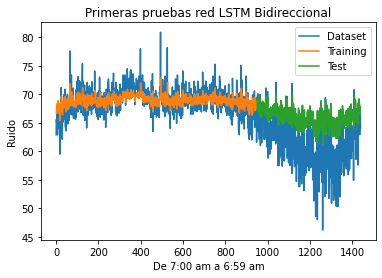

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.title('Primeras pruebas red LSTM Bidireccional')
plt.plot(scaler.inverse_transform(dataset), label='Dataset')
plt.plot(trainPredictPlot, label='Training')
plt.plot(testPredictPlot, label='Test')
plt.ylabel('Ruido')
plt.xlabel('De 7:00 am a 6:59 am')
plt.legend()
plt.show()

In [ ]:
varContador=61
var1=0

try:
     hora=int(input('Introduce la hora: '))
except ValueError:
    print ("Not a number")

while varContador>60:
  try:
     minuto=int(input('Introduce el minuto: '))
     varContador=minuto
  except ValueError:
    print ("Not a number")
      
if hora==7:
  var1=var1+minuto  
  print("El ruido a esa hora fue: ",trainPredict[var1])
elif hora>7 and (hora<=22 and minuto<=46):
  var1=hora-7
  var1=(var1*60)+minuto  
  print("El ruido a esa hora fue: ",trainPredict[var1])
elif hora==22 and minuto==47:
  print("El ruido a esa hora fue: ",testPredict[0])
elif (hora>=22 and minuto>47) and hora<25 :
  var1=hora-22
  var1=(var1*60)+minuto-48  
  print("El ruido a esa hora fue: ",testPredict[var1])
elif hora>=0 and hora<7:
  var1=hora
  var1=(var1*60)+minuto+68 
  print("El ruido a esa hora fue: ",testPredict[var1])
else:
  print("Hora no valida ")



Introduce la hora: 5
Introduce el minuto: 45
El ruido a esa hora fue:  [65.66761]
